# Assignment-7

# 1. 2-D function

steps = 52
Local minimum occurs at: -1.4999671162131603


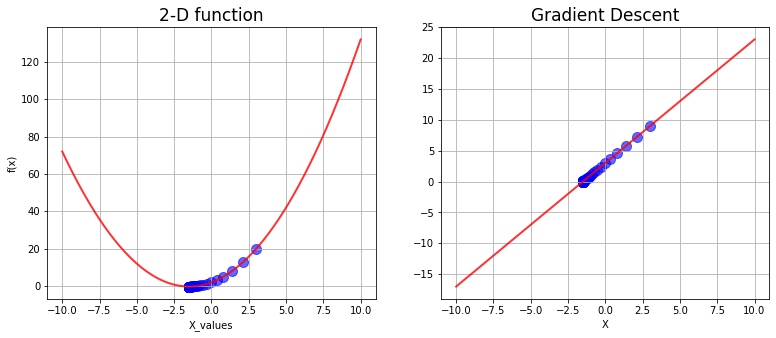

In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
# defining the 2-D function
def f(x):
    return x**2 + 3*x + 2
x_1 = np.linspace(start=-10,stop=10,num=500)
# defining the derivative of function
def df(x):
    return 2*x + 3
#intialising the parameters
new_x = 3
previous_x = 0
learningrate = 0.1
precision = 0.00001
x_list = [new_x]
slope_list = [df(new_x)]
for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - learningrate * gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('steps =', n)
        break
print('Local minimum occurs at:', new_x)
plt.figure(figsize=[20, 5])
plt.subplot(1, 3, 1)
plt.title('2-D function',fontsize=17)
plt.xlabel('X_values')
plt.ylabel('f(x)')
plt.plot(x_1,f(x_1),color='red',linewidth=2,alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list,f(values),color='blue',s=100,alpha=0.6)
plt.grid()
plt.subplot(1, 3, 2)
plt.title('Gradient Descent',fontsize=17)
plt.xlabel('X')
plt.plot(x_1,df(x_1),color='red',linewidth=2,alpha=0.8)
plt.scatter(x_list, slope_list, color='blue', s=100, alpha=0.6)
plt.grid()
plt.show()

# 2. 3-D function

Minimum occurs at x1 value : 3.055553964501732e-10
Minimum occurs at x2 value : 3.055553964501732e-10
Minimum value of function is: 1.86728200599645e-19


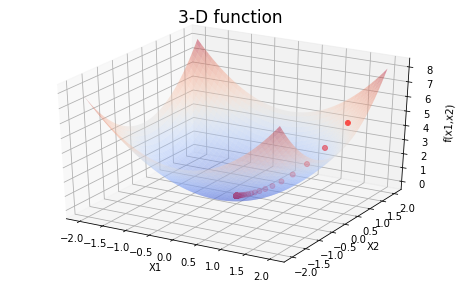

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm 
from sympy import symbols
# defining the function
def f(x1,x2):
    r = x1**2 + x2**2
    return r
# defining the Partial derivatives of function 
def fpx(x1,x2):
    return 2*x1
def fpy(x1,x2):
    return 2*x2
#intialising x and y data
x_1 = np.linspace(start=-2, stop=2, num=200)
x_2 = np.linspace(start=-2, stop=2, num=200)
x_1, x_2 = np.meshgrid(x_1,x_2)
# intialising parameters
learningrate = 0.1
max_iter = 100
values = np.array([1.5,1.5])
values_array = values.reshape(1, 2)
for n in range(max_iter):
    gradient_x = fpx(values[0], values[1])
    gradient_y = fpy(values[0], values[1])
    gradients = np.array([gradient_x, gradient_y])
    values = values - learningrate * gradients
    values_array = np.concatenate((values_array,values.reshape(1, 2)), axis=0)
print('Minimum occurs at x1 value :',values[0])
print('Minimum occurs at x2 value :',values[1])
print('Minimum value of function is:',f(values[0],values[1]))
# Generating 3D Plot
fig = plt.figure(figsize=[8, 5])
ax = fig.gca(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(x1,x2)')
plt.title('3-D function',fontsize=17)
ax.plot_surface(x_1,x_2, f(x_1,x_2), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=25, color='red')
plt.show()

# 3.Boolean function learning

<Figure size 432x288 with 0 Axes>

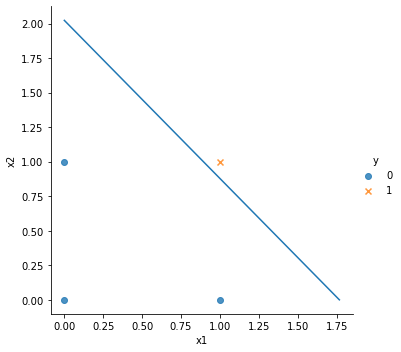

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
def step_function(x):
    if x<0:
        return 0
    else:
        return 1
# we define training set for x1.x2(and operation)
trainingset = [((0, 0), 0), ((0, 1), 0), ((1, 0), 0), ((1, 1), 1)]
# ploting data points using seaborn (Seaborn requires dataframe)
plt.figure(0)
x1 = [trainingset[i][0][0] for i in range(4)]
x2 = [trainingset[i][0][1] for i in range(4)]
y = [trainingset[i][1] for i in range(4)]
df = pd.DataFrame({'x1': x1, 'x2': x2,'y': y})
# ploting data points using seaborn (Seaborn requires dataframe)
sns.lmplot("x1","x2",data=df,hue='y',fit_reg=False, markers=["o", "x"])
# parameter initialization
w = np.random.rand(2)
errors = [] 
l_r = 0.5
epoch = 30
b = 0
for i in range(epoch):
    for x, y in trainingset:
        u = sum(x*w) + b
        error = y - step_function(u) 
        errors.append(error) 
        for index, value in enumerate(x):
            w[index] += l_r * error * value
            b += l_r*error
#final decision boundary
a = [0,-b/w[1]]
c = [-b/w[0],0]
plt.plot(a,c)

# Xor

In [13]:
# These are XOR inputs
x=np.array([[0,0,1,1],[0,1,0,1]])
# These are XOR outputs
y=np.array([[0,1,1,0]])
# Number of inputs
n_x = 2
# Number of neurons in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1]
# Learning rate
lr = 0.1
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h,n_x)# Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)# Weight matrix for output layer
losses = []   
# use sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z
# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2
# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1
def perceptron(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")
test = np.array([[1],[0]])
perceptron(w1,w2,test)
test = np.array([[0],[0]])
perceptron(w1,w2,test)
test = np.array([[0],[1]])
perceptron(w1,w2,test)
test = np.array([[1],[1]])
perceptron(w1,w2,test)

For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0


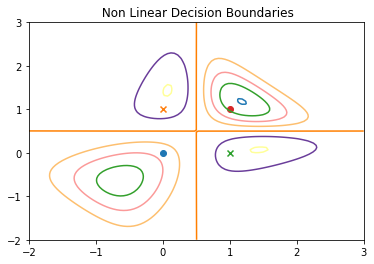

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(123)
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0],[1],[1],[0]])
#Number of epochs
num_epochs = 1000
#initialize weights
w0 = 2*np.random.random((3,4)) - 1
w1 = 2*np.random.random((4,1)) - 1
def sig(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))
from sklearn import svm
C = 1.0 # SVM regularization parameter
# we use rbf kernel
clf = svm.SVC(kernel='rbf',gamma=0.7,C=C )
clf.fit(x, y.ravel())
h = 0.02# step size in the mesh
for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(x[i, 0], x[i, 1], marker=u'x')
    elif y[i] == 0:
        plt.scatter(x[i, 0], x[i, 1], marker=u'o')
xx, yy = np.mgrid[-2:3:100j, -2:3:100j]
XXX = []
for xs, ys in zip(xx, yy):
    for x_, y_ in zip(xs, ys):
        XXX.append([x_,y_,y_*x_])
Z = clf.decision_function(XXX)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.title(" Non Linear Decision Boundaries")
plt.show()